<a href="https://colab.research.google.com/github/raviku9273/my_pr/blob/master/DS_job_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd    # perform CSV file I/O  
import numpy as np     #  use in fast computaion of array 

#loading dataset
df = pd.read_csv('ds_salaries.csv')
df.tail(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
599,599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
600,600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
601,601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [117]:
df.drop(columns=['Unnamed: 0'], inplace = True) # represent index, so we remove this column
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


***Data Description ***
* work_year	- The year the salary was paid.
* experience_level - The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
* employment_type	- The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
* job_title -	The role worked in during the year.
* salary -	The total gross salary amount paid.
* salary_currency	- The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd	- The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* employee_residence -	Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio -	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
* company_location -	The country of the employer's main office or contracting branch as an ISO 3166 country code.
* company_size -	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

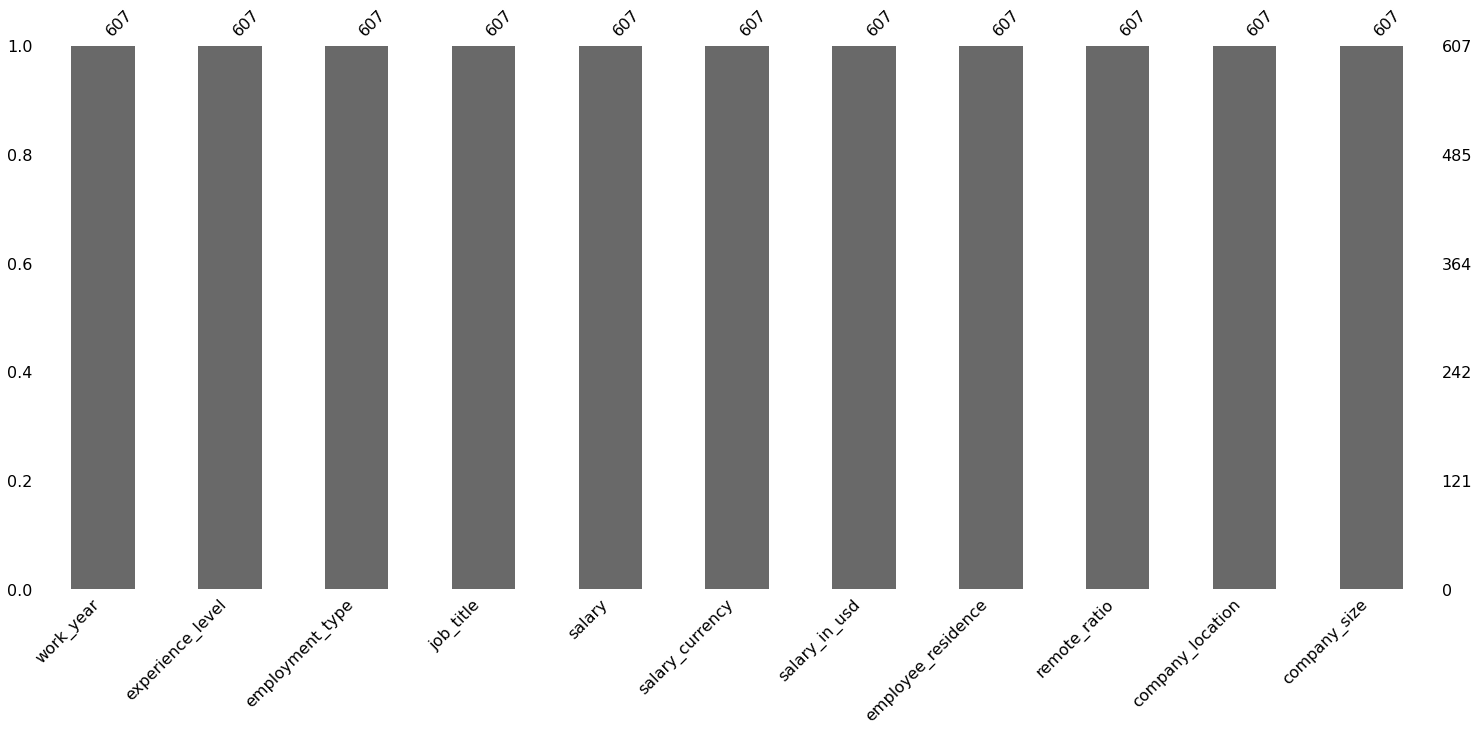

In [119]:
# check null count analysis before modelling
import missingno as msno 
p = msno.bar(df)

bar graph represent no missing values in dataframe

In [120]:
df.isnull().sum()        # check count for null values data

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [121]:
df.shape

(607, 11)

In [122]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


***Exploratory Data Analysis (EDA)***

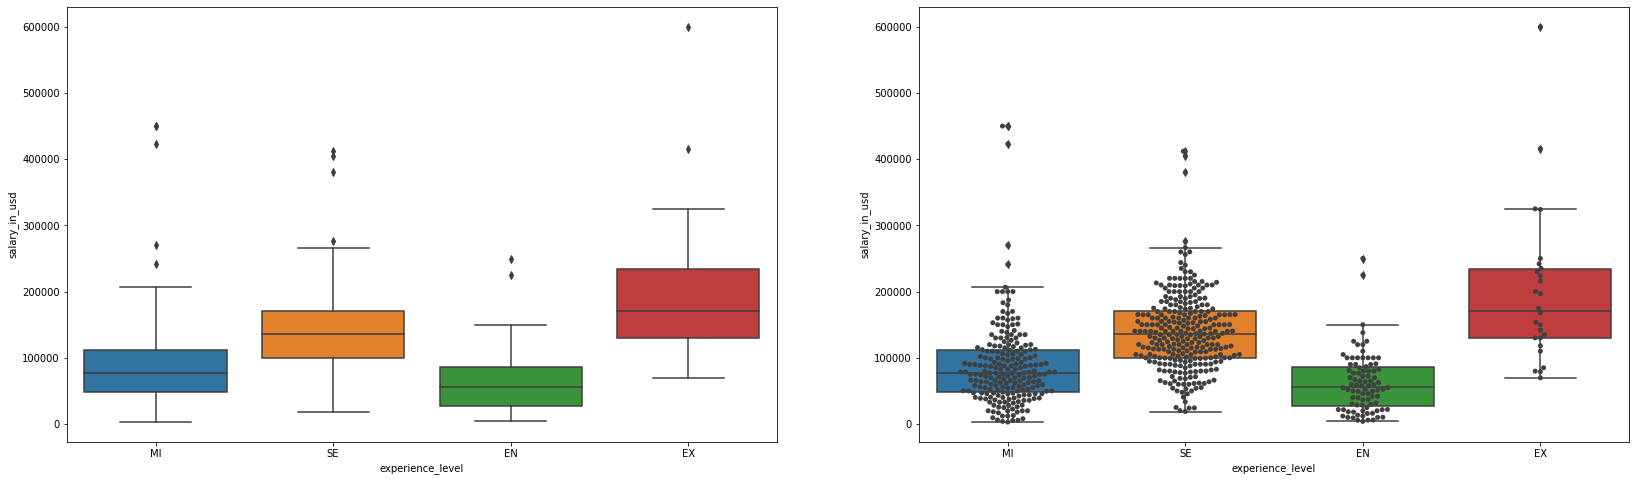

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)
plt.subplot(122)
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)
sns.swarmplot(x="experience_level", y="salary_in_usd", data=df, color = '0.25')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


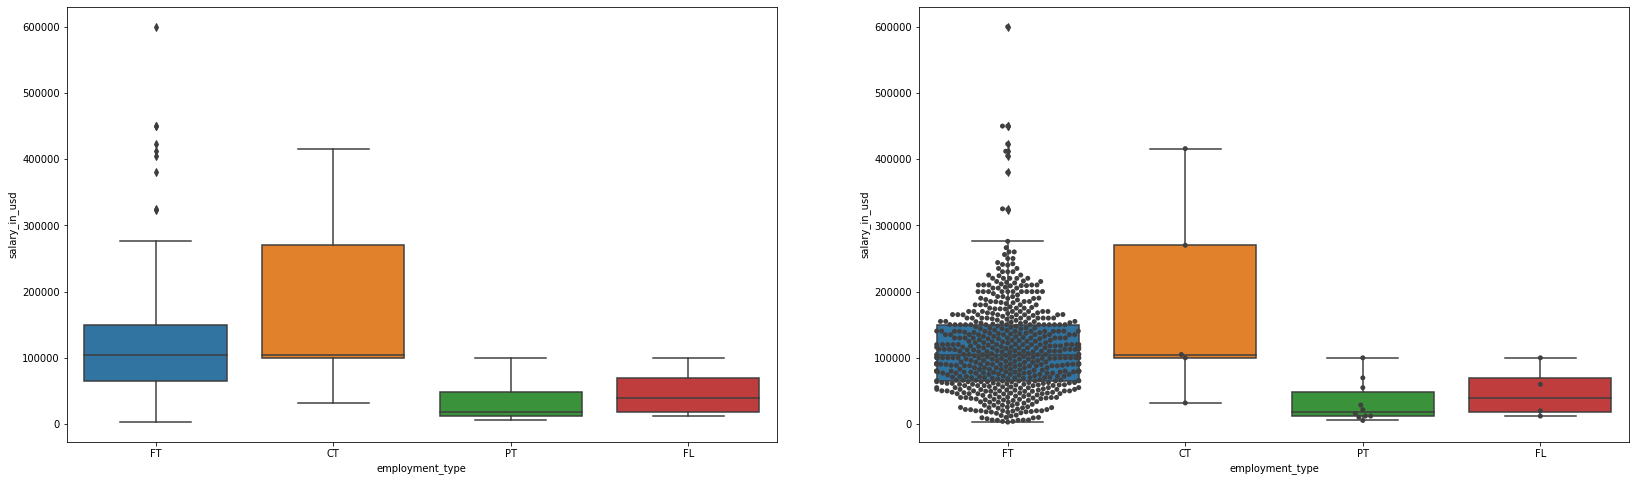

In [124]:
plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="employment_type", y="salary_in_usd", data=df)
plt.subplot(122)
sns.boxplot(x="employment_type", y="salary_in_usd", data=df)
sns.swarmplot(x="employment_type", y="salary_in_usd", data=df, color='0.25')
plt.show()

In [125]:
df['job_title'].value_counts()           # Display count of each job title values

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

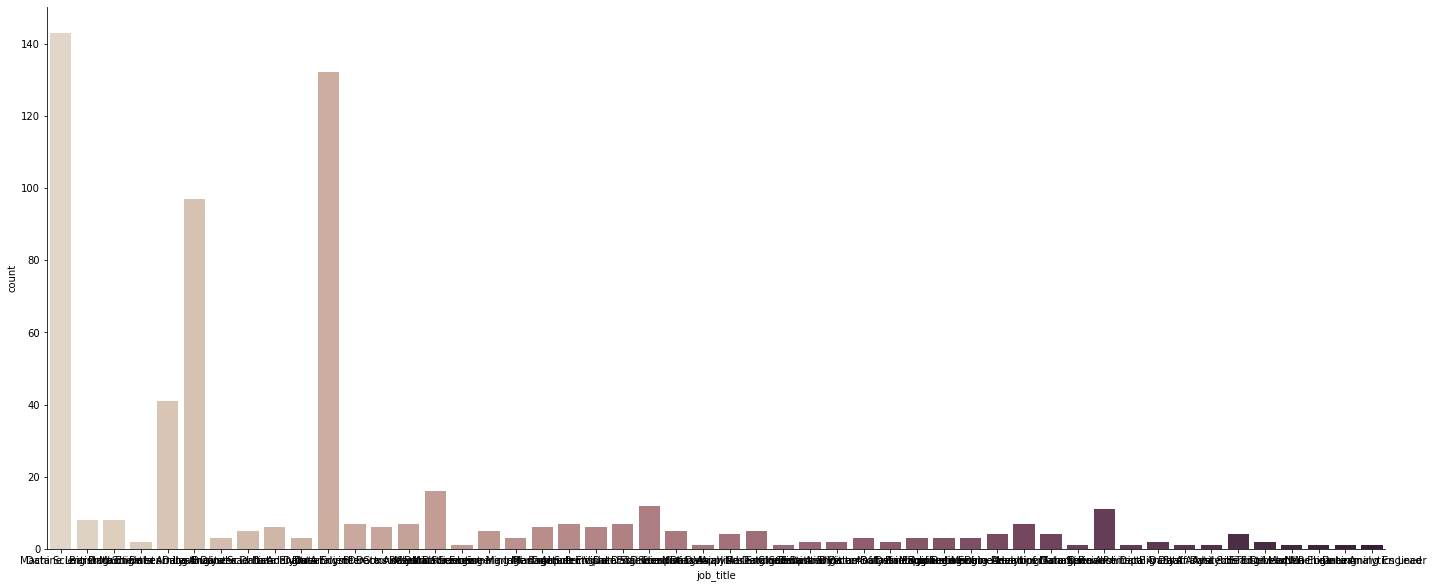

In [126]:
# Displaying the count plot of each job title
sns.catplot(data=df, x='job_title', kind='count', 
    palette="ch:.25", height=8.27, aspect=20/8.27)


In [127]:
Top_6_job =  df['job_title'].value_counts()[:6].keys()   # Extract top six job title
df_new = df[df['job_title'].isin(Top_6_job)]
df_new['job_title'].value_counts()

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Name: job_title, dtype: int64

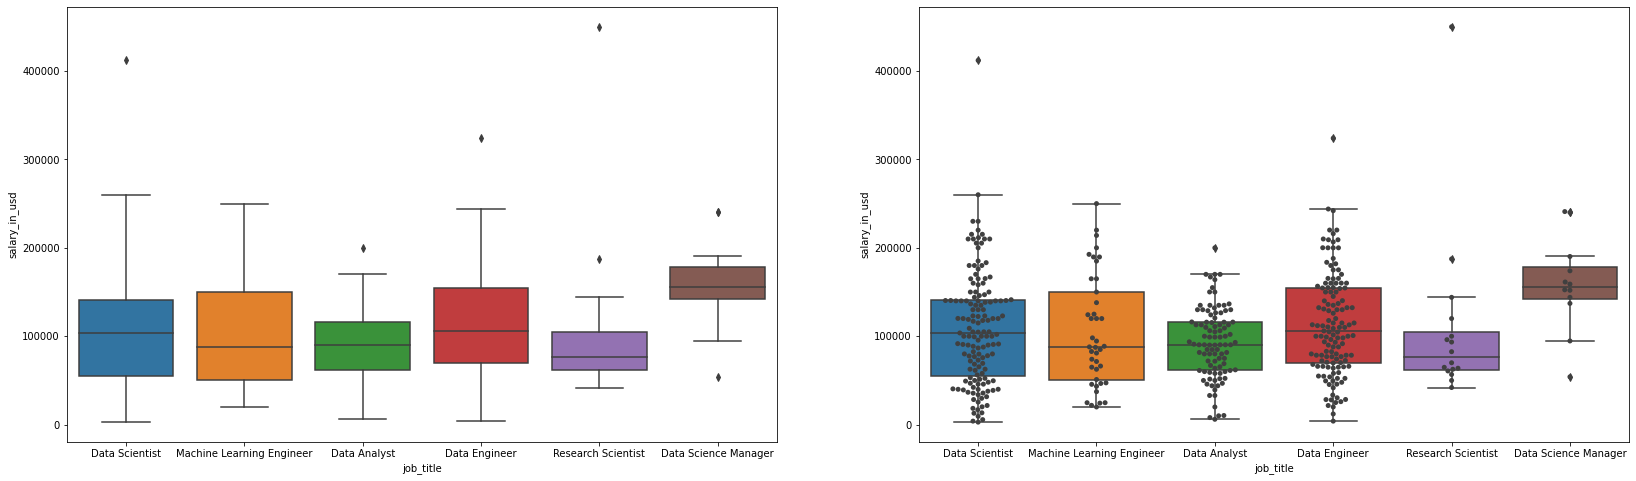

In [128]:
plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="job_title", y="salary_in_usd", data=df_new)
plt.subplot(122)
sns.boxplot(x="job_title", y="salary_in_usd", data=df_new)
sns.swarmplot(x="job_title", y="salary_in_usd", data=df_new, color ='0.25')
plt.show()

Mean Salary of Data Science Manager is most highest

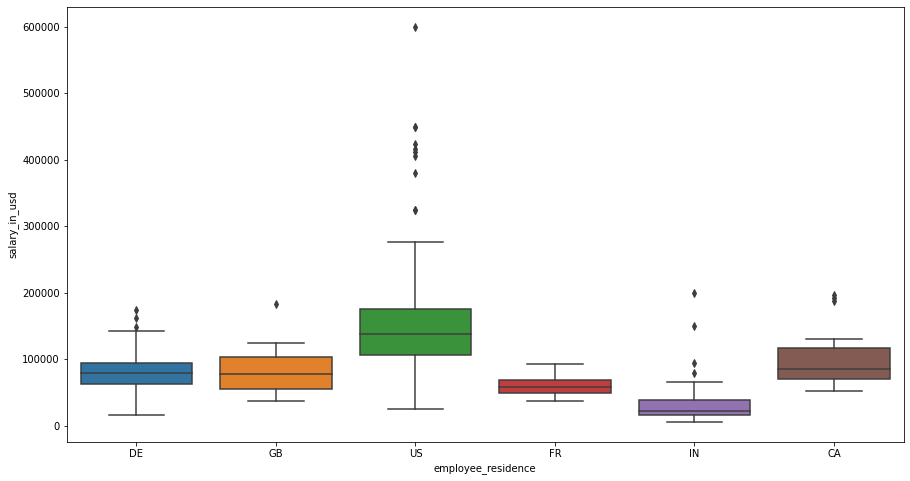

In [129]:
Top_6_employee =  df['employee_residence'].value_counts()[:6].keys()
df_employee = df[df['employee_residence'].isin(Top_6_employee)]

plt.figure(figsize=(15,8))
sns.boxplot(x="employee_residence", y="salary_in_usd", data=df_employee)

Above box plot shows, Mean salary in US is most highest

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


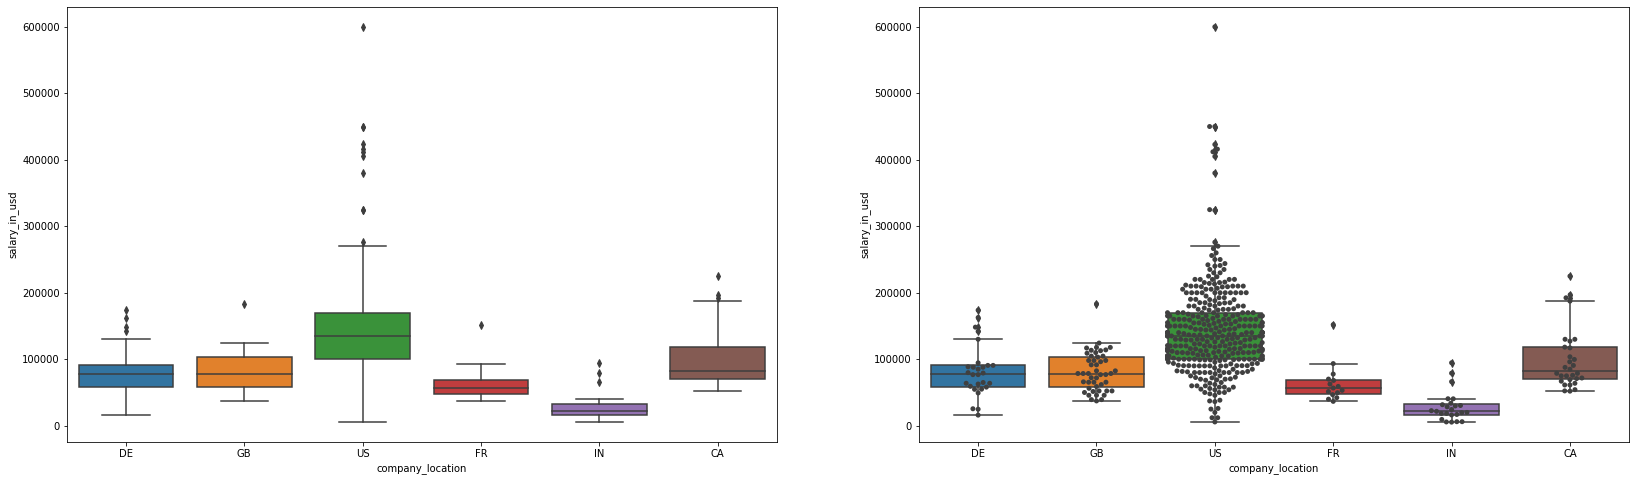

In [130]:
Top_6_company_data =  df['company_location'].value_counts()[:6].keys()
df_company = df[df['company_location'].isin(Top_6_company_data)]

plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="company_location", y="salary_in_usd", data=df_company)
plt.subplot(122)
sns.boxplot(x="company_location", y="salary_in_usd", data=df_company)
sns.swarmplot(x="company_location", y="salary_in_usd", data=df_company, color='0.25')
plt.show()

Above box plot shows, US is mostly paid salary in company location wise

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


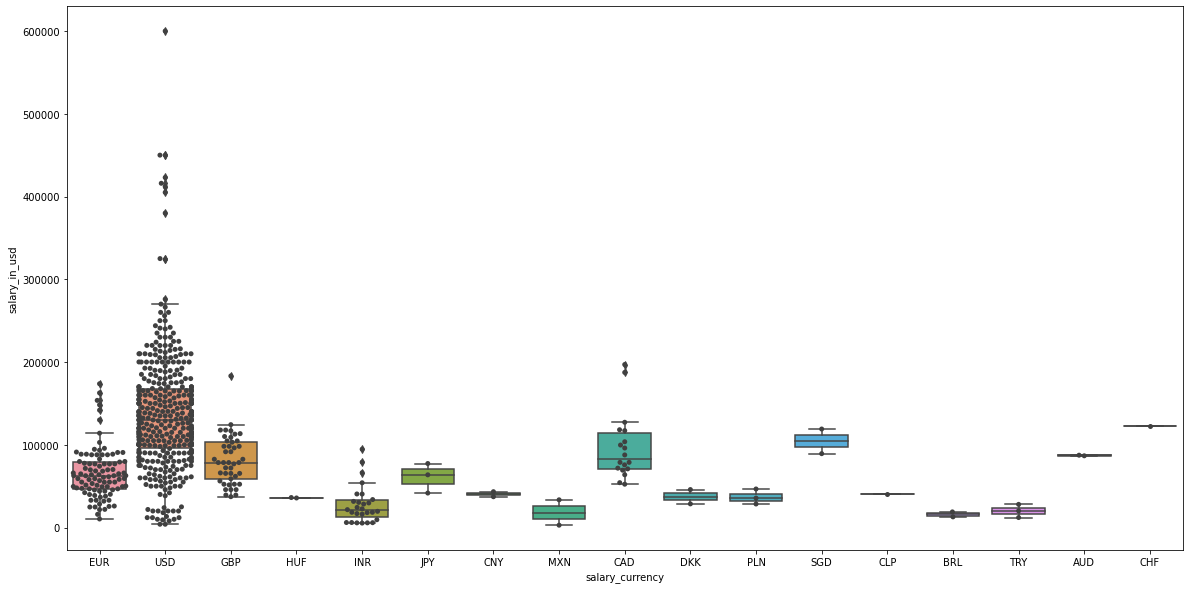

In [131]:
plt.figure(figsize=(20,10))
sns.boxplot(x="salary_currency", y="salary_in_usd", data=df)
sns.swarmplot(x="salary_currency", y="salary_in_usd", data=df, color = '0.25')

Above box plot shows Mean USD is highest salary currency 

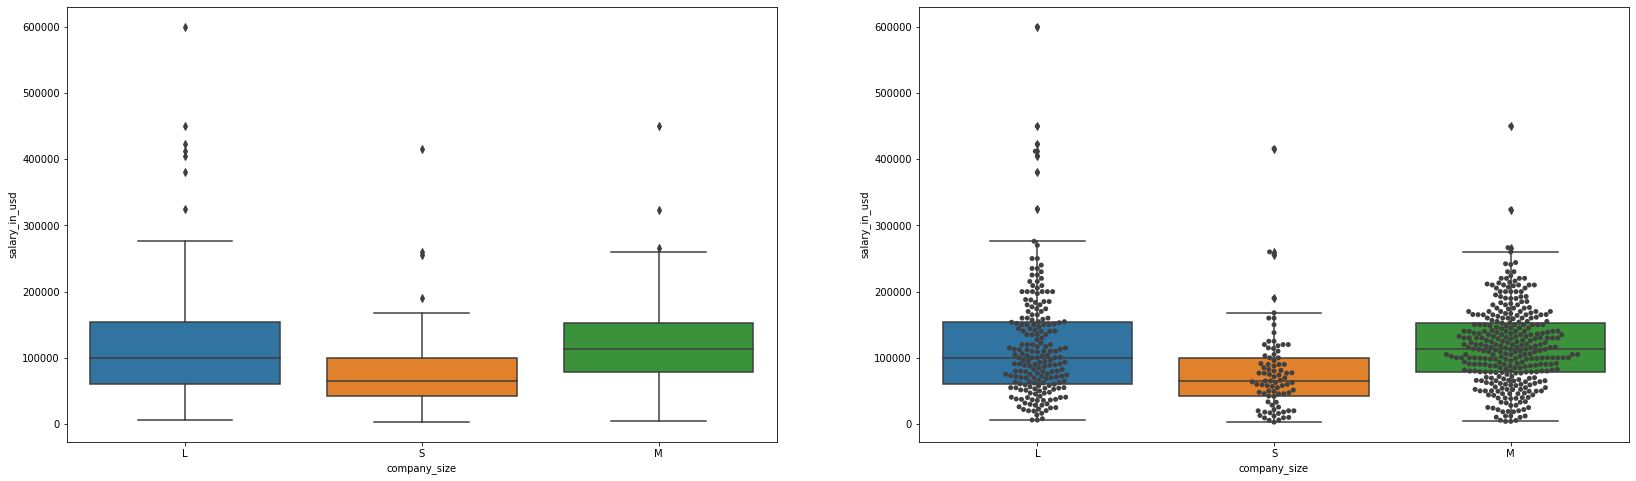

In [132]:
plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="company_size", y="salary_in_usd", data=df)
plt.subplot(122)
sns.boxplot(x="company_size", y="salary_in_usd", data=df)
sns.swarmplot(x="company_size", y="salary_in_usd", data=df, color = '0.25')
plt.show()

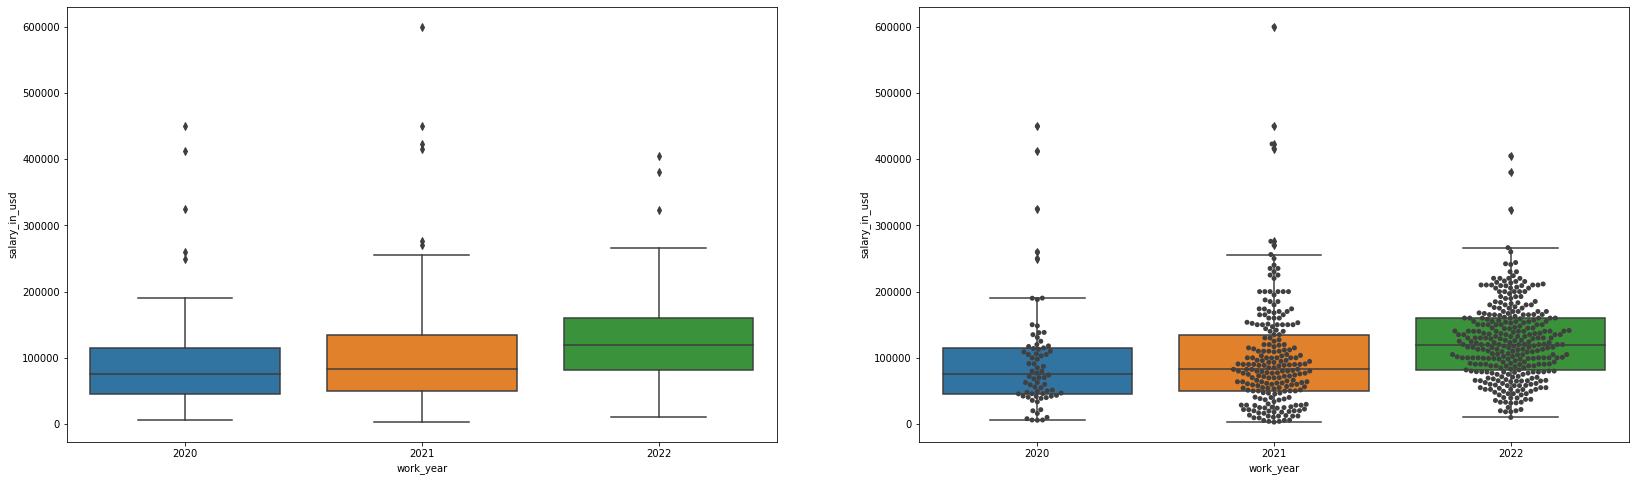

In [133]:
plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="work_year", y="salary_in_usd", data=df)
plt.subplot(122)
sns.boxplot(x="work_year", y="salary_in_usd", data=df)
sns.swarmplot(x="work_year", y="salary_in_usd", data=df, color='0.25')
plt.show()

Above box plot shows Mean in 2022 is more than other year

<Figure size 1080x576 with 0 Axes>

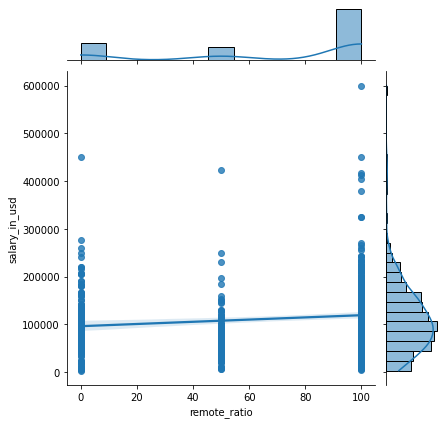

In [134]:
plt.figure(figsize=(15,8))
sns.jointplot(x="remote_ratio", y="salary_in_usd", data=df, kind="reg")

 data is more focused on 0, 50 and 100, insightful

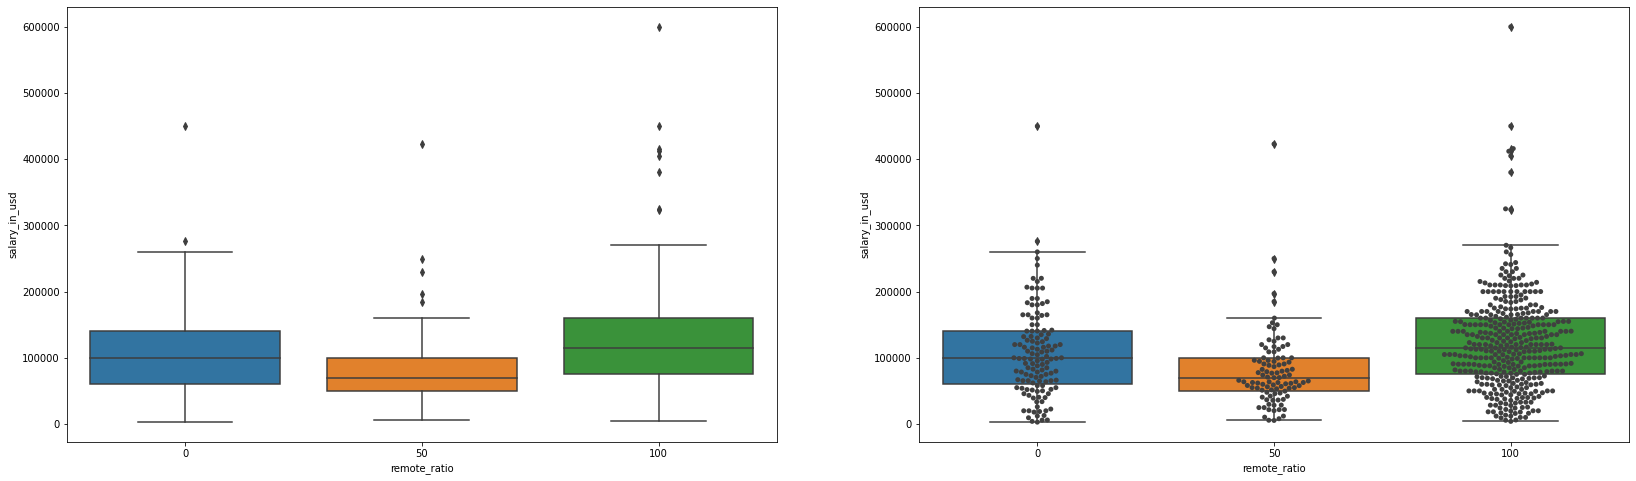

In [135]:
plt.figure(figsize=(28,8))
plt.subplot(121)
sns.boxplot(x="remote_ratio", y="salary_in_usd", data=df)
plt.subplot(122)
sns.boxplot(x="remote_ratio", y="salary_in_usd", data=df)
sns.swarmplot(x="remote_ratio", y="salary_in_usd", data=df, color='0.25')
plt.show()

Mean remote_ratio 100 is more than others

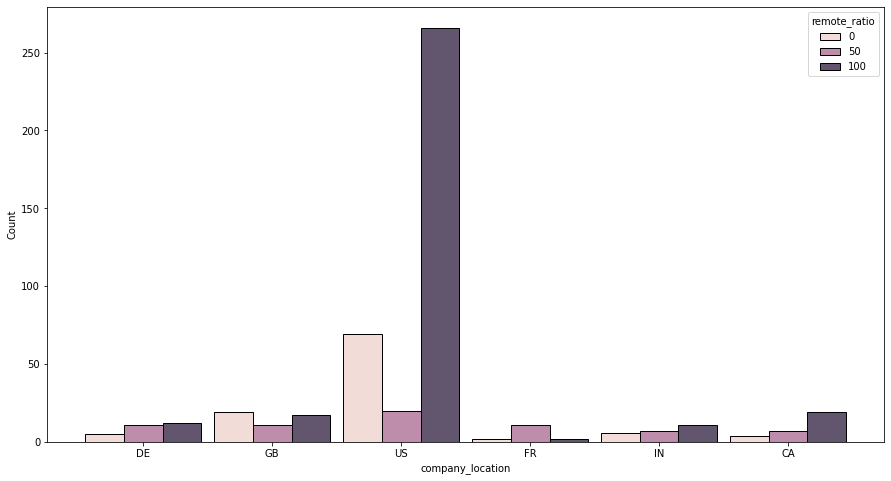

In [136]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="company_location", hue="remote_ratio", data=df_company, multiple="dodge", shrink=.9)

Above plot symbolise US has most remote ratio in all categories

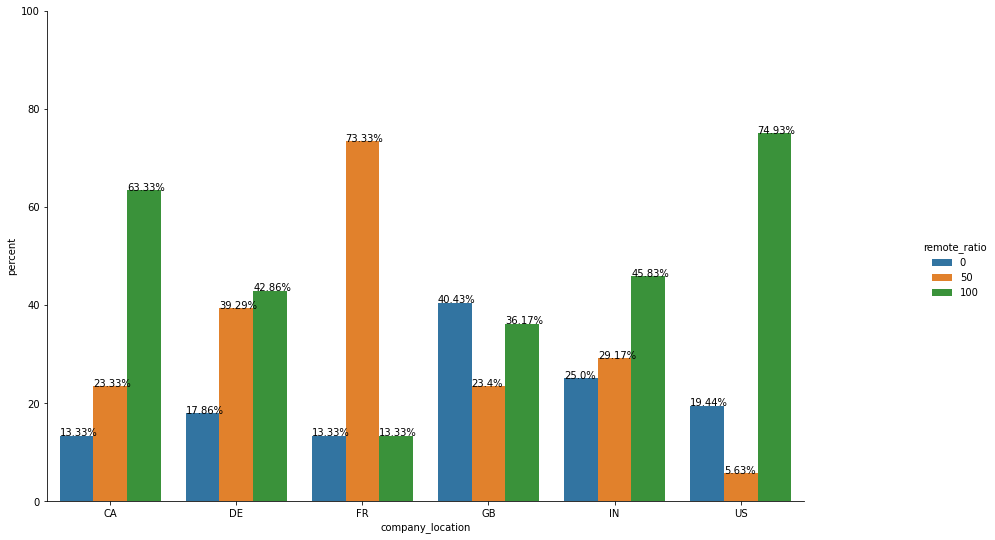

In [137]:
x,y = 'company_location', 'remote_ratio'

g = (df_company
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
g.fig.set_size_inches(15,8)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Remote ratio percent wise company location of US is more in 100th categories. proportion of remote work per country, that gives insight about how data is distributed in this type of work on the selected countries 

 ***Regression Model***

In [138]:
from sklearn.preprocessing import OneHotEncoder
def category_to_column(df, column, prefix=''):
    dataframe_copy = df.copy()
    encoder_style = OneHotEncoder()
    encoder_results = encoder_style.fit_transform(dataframe_copy[[column]])
    name_columns = prefix + encoder_style.categories_[0]
    temp = pd.DataFrame(encoder_results.toarray(), columns=name_columns, index=dataframe_copy.index)
    dataframe_copy = pd.concat([dataframe_copy, temp], axis=1)
    return dataframe_copy

In [139]:
columns_category = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
dataframe_vol2 = df.copy()
for column in columns_category:
    dataframe_vol2 = category_to_column(dataframe_vol2, column)
dataframe_vol2 = dataframe_vol2.drop(columns=columns_category)
dataframe_vol2.head()

,work_year,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,EN,EX,MI,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,2020,Data Scientist,70000,79833,DE,0,DE,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,Machine Learning Scientist,260000,260000,JP,0,JP,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020,Big Data Engineer,85000,109024,GB,50,GB,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,Product Data Analyst,20000,20000,HN,0,HN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2020,Machine Learning Engineer,150000,150000,US,50,US,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [140]:
dataframe_vol3 = dataframe_vol2.drop(columns=['job_title', 'salary', 'employee_residence', 'company_location'])
dataframe_vol3 .head()

,work_year,salary_in_usd,remote_ratio,EN,EX,MI,SE,CT,FL,FT,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,2020,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2020,150000,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


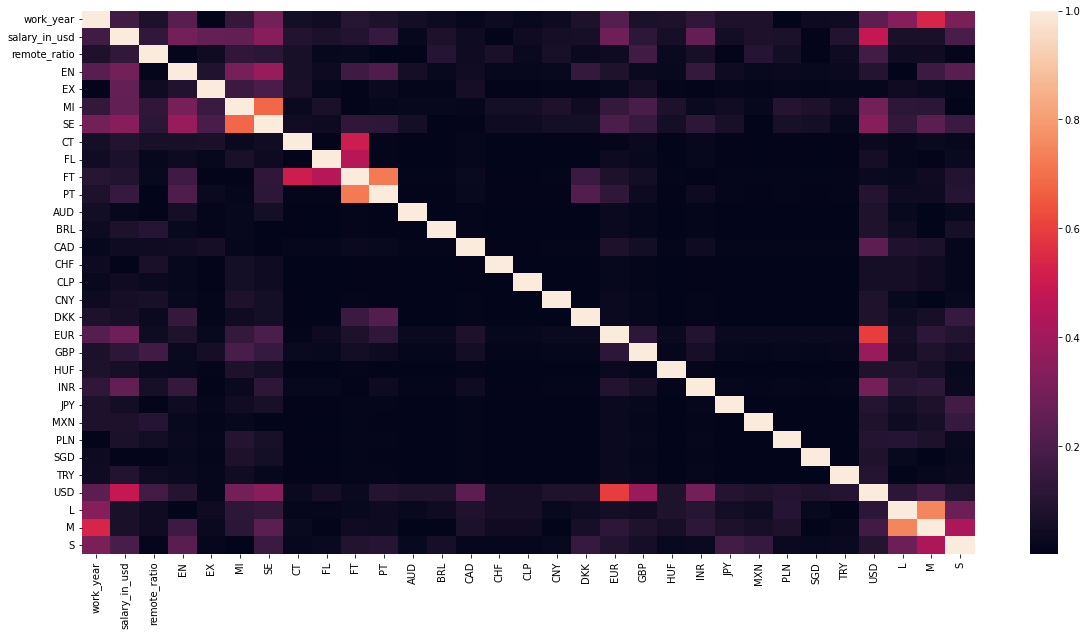

In [141]:
# Plotting correlation between variable, how they are related to each other
plt.figure(figsize=(20,10))
sns.heatmap(dataframe_vol3 .corr().abs())

SE and MI, PT and FT, M and L are more positively co-related

In [142]:
from sklearn.preprocessing import StandardScaler

feature = dataframe_vol3 .drop(columns=['salary_in_usd'])
target = dataframe_vol3 ['salary_in_usd']

scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = scaler.transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, columns=feature.columns, index=feature.index)
feature_scaled.head()

,work_year,remote_ratio,EN,EX,MI,SE,CT,FL,FT,PT,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,-2.032024,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,-1.379966,1.437239,-1.077099,-0.397991
1,-2.032024,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,-0.695778,-1.077099,2.512619
2,-2.032024,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,-1.379966,-0.695778,0.928420,-0.397991
3,-2.032024,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,-0.695778,-1.077099,2.512619
4,-2.032024,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,1.437239,-1.077099,-0.397991


**Scaling Dataset**

In [143]:
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))
target_scaled[0:5]

array([[-0.45790445],
       [ 2.08328151],
       [-0.04617667],
       [-1.30182581],
       [ 0.53177399]])

***Divide in train and test dataset***

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled , target_scaled, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

***Model Buiding***

In [145]:
# Linera regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

0.38626709037373214

In [146]:
# Support Vector machine
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38325981011167937

In [147]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

0.8400183703776242

In [148]:
# Neural Network
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='linear', input_dim=X_train.shape[1]),
     keras.layers.Dense(256 ,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    keras.layers.Dense(1,  kernel_initializer='random_uniform', activation='linear', use_bias=False)
  ])
model.compile(loss='mean_squared_error', optimizer='adam')
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 37ms/step - loss: 0.9087 - val_loss: 0.4607
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.7137 - val_loss: 0.3704
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 0.6455 - val_loss: 0.3929
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6394 - val_loss: 0.3841
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6550 - val_loss: 0.4088
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.6340 - val_loss: 0.3999
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 0.6221 - val_loss: 0.3695
Epoch 8/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6366 - val_loss: 0.4589
Epoch 9/100
16/16 [==============================] - 0s 14ms/step - loss: 0.6403 - val_loss: 0.3622
Epoch 10/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6313 - val_loss: 0.3954
Epo

Text(0, 0.5, 'Cost')

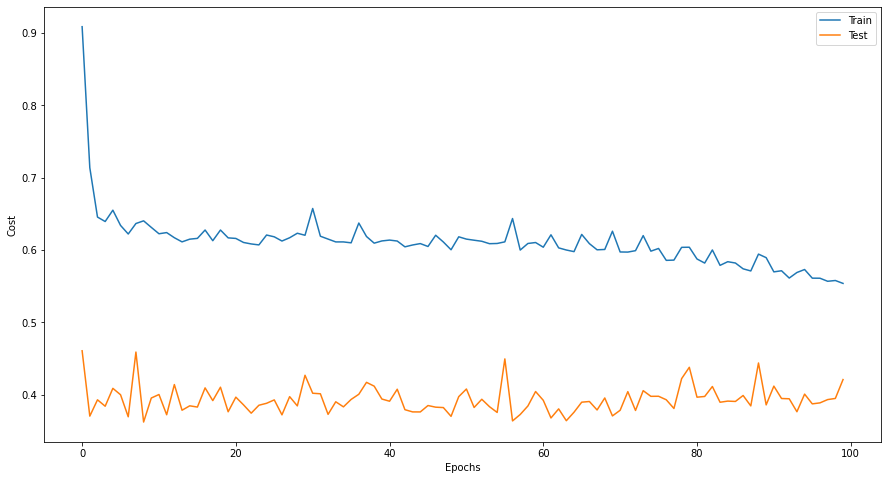

In [149]:
plt.figure(figsize=(15,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Cost')